In [49]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [50]:
df = pd.read_csv('../../dataset/raw/hair_salon_no_show_wrangled_df.csv')
df = df.drop(['Unnamed: 0', 'last_tod'], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_tod           1717 non-null   object 
 1   book_dow           1952 non-null   object 
 2   book_category      1952 non-null   object 
 3   book_staff         1952 non-null   object 
 4   last_category      1003 non-null   object 
 5   last_staff         1003 non-null   object 
 6   last_day_services  1952 non-null   int64  
 7   last_receipt_tot   1952 non-null   float64
 8   last_dow           1003 non-null   object 
 9   last_noshow        1952 non-null   int64  
 10  last_prod_flag     1952 non-null   int64  
 11  last_cumrev        1952 non-null   int64  
 12  last_cumbook       1952 non-null   int64  
 13  last_cumstyle      1952 non-null   int64  
 14  last_cumcolor      1952 non-null   int64  
 15  last_cumprod       1952 non-null   int64  
 16  last_cumcancel     1952 

,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
0,afternoon,Wednesday,STYLE,JJ,NaN,NaN,0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0
1,morning,Wednesday,COLOR,JOANNE,NaN,NaN,0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262.0,Wednesday,0,1,262,2,1,1,2,0,0,0,35
3,afternoon,Thursday,STYLE,KELLY,NaN,NaN,0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0
4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Thursday,0,0,35,1,1,0,0,0,0,0,9


In [51]:
# 컬럼 별 유니크 값 확인
for i in df.columns:
    print(i+":",df[i].unique())

book_tod: ['afternoon' 'morning' nan 'evening']
book_dow: ['Wednesday' 'Thursday' 'Saturday' 'Friday' 'Tuesday' 'Sunday' 'Monday']
book_category: ['STYLE' 'COLOR' 'MISC']
book_staff: ['JJ' 'JOANNE' 'KELLY' 'BECKY' 'HOUSE' 'SINEAD' 'TANYA']
last_category: [nan 'COLOR' 'STYLE' 'MISC']
last_staff: [nan 'JOANNE' 'KELLY' 'BECKY' 'HOUSE' 'JJ' 'SINEAD' 'TANYA']
last_day_services: [0 2 1 3]
last_receipt_tot: [  0.   262.    35.    55.    76.   100.4  230.    30.    50.    82.
  40.   119.6   96.6   52.   202.   137.    70.    95.   120.    70.73
 119.8   65.   282.   182.    60.   110.4  154.25  90.   115.   102.
 125.4   80.   170.   195.   250.    83.8  210.    85.   105.    59.4
  75.   210.75 172.73  81.05  32.   160.   100.   190.   122.   245.
 113.5  167.    68.45 242.   132.4   45.   255.55 130.   101.4  220.
 382.8   63.45 135.   225.   172.   215.   199.8  111.4  125.   260.
 339.   108.31 117.39  78.8  180.   182.8  192.    15.   147.   300.
 114.44 228.25 182.73  67.   350.   110.3

In [52]:
num_col = df.select_dtypes(include=['int64', 'float64'])

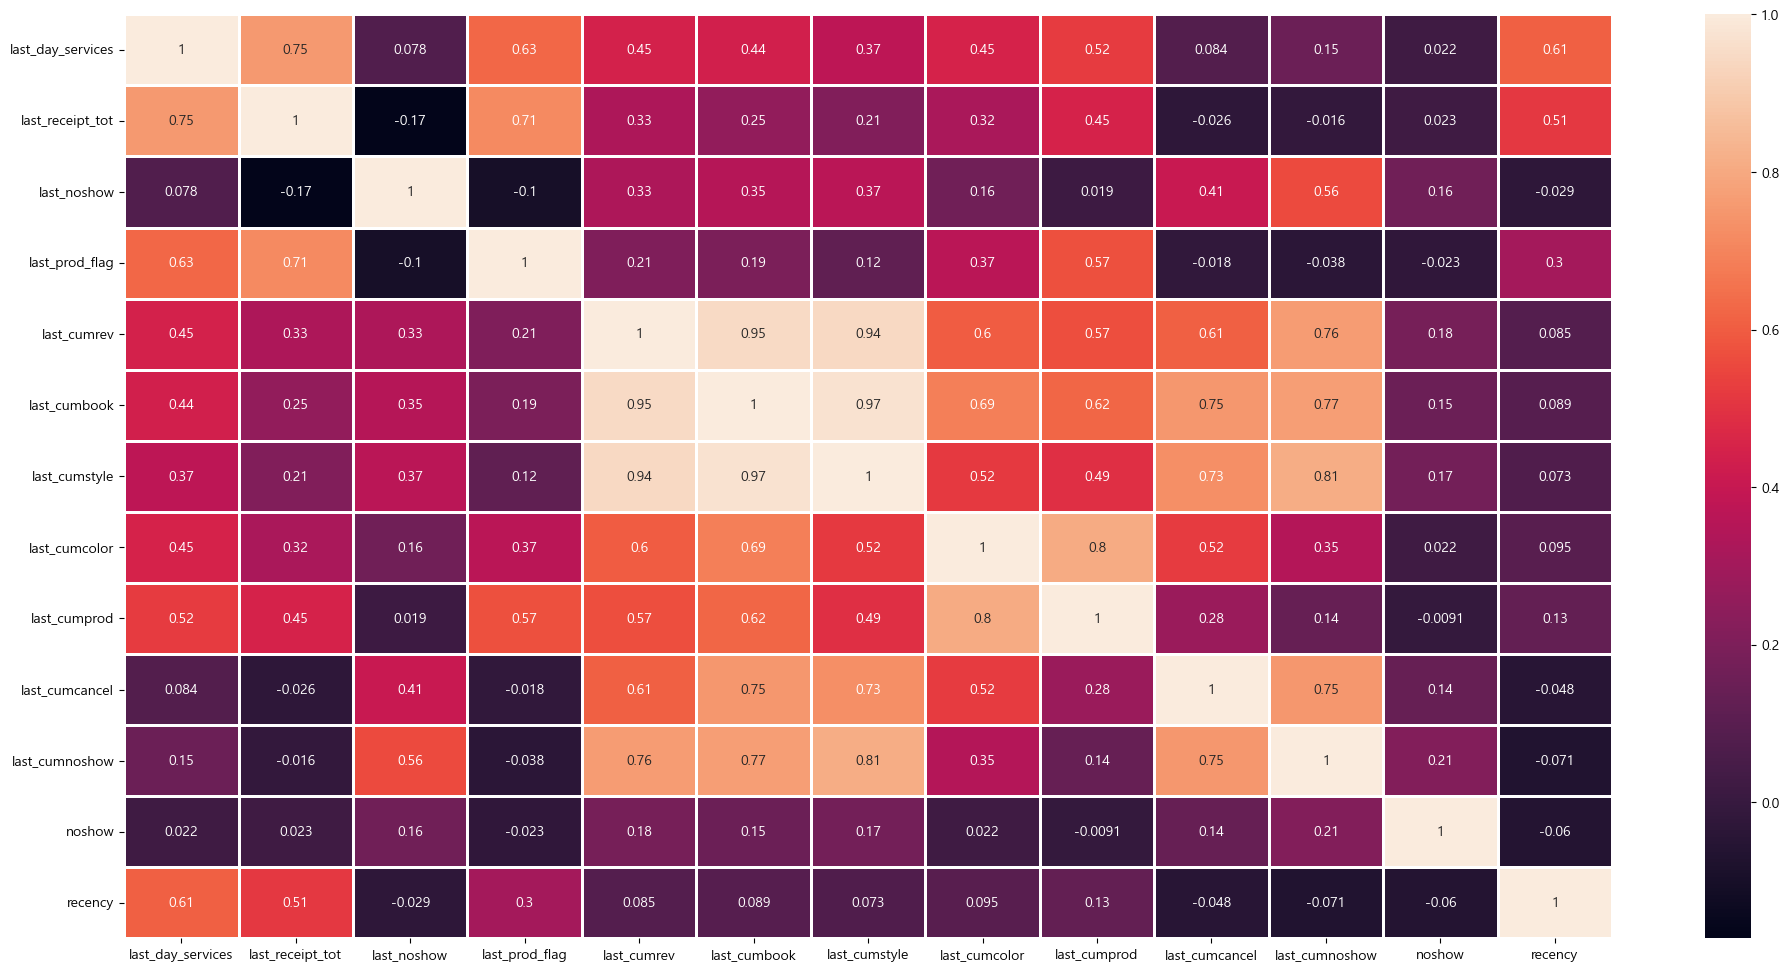

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (24, 12))

corr = num_col.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [54]:
# checking for null values 
null = pd.DataFrame({
                        'Null Values' : df.isna().sum(),
                        'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)
                    })
null.sort_values(by=['Null Values'],ascending=False)

,Null Values,Percentage Null Values
last_staff,949,48.616803
last_dow,949,48.616803
last_category,949,48.616803
book_tod,235,12.038934
book_staff,0,0.000000
book_category,0,0.000000
book_dow,0,0.000000
last_day_services,0,0.000000
last_receipt_tot,0,0.000000
last_noshow,0,0.000000


In [55]:
# 결측치 채우기 (원본 df 기준)
df['last_staff'] = df['last_staff'].fillna('첫방문')
df['last_category'] = df['last_category'].fillna('없음')
df['last_dow'] = df['last_dow'].fillna('없음')
df['book_tod'] = df['book_tod'].fillna('기타')

# 파생 변수 생성
df['is_first_visit'] = df['last_staff'].isna().astype(int)


In [60]:
X = df.drop(columns='noshow')
y = df['noshow']

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_idx = [X.columns.get_loc(col) for col in categorical_cols]
numeric_idx = [X.columns.get_loc(col) for col in numeric_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_idx),
        ('num', StandardScaler(), numeric_idx)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(random_state=0))
])

param_grid = {
    'classifier__penalty': ['l2'],  # 또는 ['l1', 'l2'] (solver에 따라 제한됨)
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs'],  # 'l1'은 'liblinear', 'saga'만 지원
    'classifier__class_weight': ['balanced', None],
    'classifier__max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',  # 필요 시 'recall', 'roc_auc' 등으로 변경 가능
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          8]),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         [6, 7,
                                                                          9, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18,
                                                                          19])])),
                                       ('classifier',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__class_weight': ['balanced', None],
                         'classifier__max_iter': [100, 200, 500],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             scoring='recall', verbose=1)

In [61]:
from metrics import print_binary_classification_metrics

pred_train = grid_search.predict(X_train)
pred_train_proba = grid_search.predict_proba(X_train)[:, 1]
print_binary_classification_metrics(y_train, pred_train, pred_train_proba)

pred_test = grid_search.predict(X_test)
pred_test_proba = grid_search.predict_proba(X_test)[:, 1]
print_binary_classification_metrics(y_test, pred_test, pred_test_proba)

정확도: 0.8584240871236387
재현율: 0.7840909090909091
정밀도: 0.42990654205607476
F1 점수: 0.5553319919517102
Average Precision: 0.3812035893272214
ROC-AUC Score: 0.8635461109287825
정확도: 0.8567774936061381
재현율: 0.7916666666666666
정밀도: 0.4523809523809524
F1 점수: 0.5757575757575758
Average Precision: 0.42017896972081936
ROC-AUC Score: 0.8561103012633625
